# 5: Pandas

<a href="https://nb.bohrium.dp.tech/detail/1211642161?utm_source=ck-github" target="_blank"><img src="https://cdn.dp.tech/bohrium/web/static/images/open-in-bohrium.svg" alt="Open In Bohrium"/></a>

虽然 NumPy 是 SciPy 生态系统的基础，提供了非常强大的 ndarray 对象，但它也有一些不足之处。首先，NumPy 数组不能在一个数组中容纳不同类型的对象。例如，如果我们尝试将以下包含整数、浮点数和字符串的列表转换为数组，NumPy 将所有元素转换为字符串，以使对象类型统一。

In [2]:
nums = [1, 2, 3, 'four', 5, 'six', 7.0]

In [3]:
import numpy as np
np.array(nums)

array(['1', '2', '3', 'four', '5', 'six', '7.0'], dtype='<U32')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

NumPy 的第二个不足之处是它不支持数据中的标签。也就是说，列不能包含描述它们包含的内容的标签，就像你在一个构造良好的电子表格中看到的那样。这使得用户必须跟踪哪一列包含了哪些信息。最后，虽然 NumPy 包含了丰富的基本数据处理工具，但仍有许多操作不支持，比如根据特定列的值对数据进行分组，或者自动对齐类似数据以合并两个数据集的能力。

一位名叫 Wes McKinney 的数据科学家创建了 pandas 库，它为处理数据提供了丰富的附加工具，可能最受喜爱的特性是能够根据标签调用数据。数据列和行可以包含人类可读的标签，用于访问数据。如果用户希望使用索引访问数据，Pandas也支持，但是现在用户可以在不知道数据所在列的情况下访问数据，只要用户知道列标签。

按照流行的惯例，pandas 库使用`pd` 别名导入，这里也使用了它。本章还假设有以下导入。

## 5.1 Pandas 基本对象

为了支持丰富的功能，pandas 使用自己的对象来存储数据，称为 Series 和 DataFrame，它们是基于 NumPy 数组构建的。因为它们是基于 NumPy 构建的，所以许多 NumPy 函数（如 `np.mean()`）在 pandas 对象上也能工作。Series 和 DataFrame 的关键区别在于，Series 是一维的，而 DataFrame 是二维的。与 NumPy 数组不同，pandas 对象具有固定的维数。还有一个三维对象叫做 *Panel*，但这里不会涉及它，因为它并不经常使用。

### 5.1.1  Series

虽然 pandas *Series* 仅限于单个维度，但它可以根据需要扩展以容纳数据。下面使用 `pd.Series()` 函数生成了一个包含周期表前五个元素原子质量的 Series。这个函数总是大写的。

In [5]:
mass = pd.Series([1.01,4.00,6.94,9.01,10.81])
mass

0     1.01
1     4.00
2     6.94
3     9.01
4    10.81
dtype: float64

右侧列是Series中的实际数据，而左侧的值是为Series中的每个值分配的索引。索引列不是Series的维度的一部分；它是元数据（即关于数据的数据）。

与列表、元组和ndarrays一致，可以使用下面演示的方括号索引来访问Series中的值。

In [6]:
mass[2]

6.94

与迄今为止看到的其他多元素对象不同，可以使用与默认值（即0、1、2等）不同的索引访问Series中的数据。也就是说，可以使用下面显示的index参数分配自定义索引。

In [7]:
index=('H', 'He', 'Li', 'Be', 'B')
mass2 = pd.Series([1.01,4.00,6.94,9.01,10.81], index)
mass2

H      1.01
He     4.00
Li     6.94
Be     9.01
B     10.81
dtype: float64

现在可以使用自定义索引来访问Series中的元素。这使得Series的行为有点像字典。

In [8]:
mass2['He']

4.0

可以通过使用`mass2.index`来访问索引。还可以在创建Series后通过使用`.index`和赋值来修改Series索引，如下面所示。

In [9]:
mass.index =['H', 'He', 'Li', 'Be', 'B']
mass

H      1.01
He     4.00
Li     6.94
Be     9.01
B     10.81
dtype: float64

即使我们创建或修改一个Series以具有自定义索引，我们仍然可以使用`iloc[]`方法通过传统的数值索引访问元素。无论分配的索引值如何，此方法都允许用户像在NumPy数组中一样访问元素。

In [10]:
mass2.iloc[2]

6.94

### 5.1.2 DataFrame

大多数您将使用的数据都最适合放在一个二维的pandas对象中，称为*DataFrame*，总是用两个大写字母表示。DataFrame与Series相似，只是现在还有带有名称的列。可以通过列名访问列，可以通过索引访问行。您可以将DataFrame看作是一组Series对象。如下，构建一个DataFrame来容纳前五个元素的名称、原子序数、质量和电离能。

In [11]:
name = ['hydrogen', 'helium', 'lithium', 'beryllium','boron']
AN = [1,2,3,4,5]
mass = [1.01,4.00,6.94,9.01,10.81]
IE = [13.6, 24.6, 5.4, 9.3, 8.3]

In [12]:
columns = ['H', 'He', 'Li', 'Be','B'] 
index = ['name', 'AN', 'mass', 'IE']
elements = pd.DataFrame([name, AN, mass, IE], 
                        columns=columns, index=index)
elements

,H,He,Li,Be,B
name,hydrogen,helium,lithium,beryllium,boron
AN,1,2,3,4,5
mass,1.01,4.0,6.94,9.01,10.81
IE,13.6,24.6,5.4,9.3,8.3


要访问DataFrame中的数据，请将列名放在方括号中。

In [13]:
elements['Li']

name    lithium
AN            3
mass       6.94
IE          5.4
Name: Li, dtype: object

从本质上讲，我们从列中得到的是一个左侧显示的带有索引的Series。

要指示一行，可以使用`loc[]`方法。我们再次得到一个Series，其索引来源于源DataFrame中的列名。可以将这个Series放在一个变量中，并像[5.1.1](5.1.1)部分那样进行索引。

In [14]:
elements.loc['IE']

H     13.6
He    24.6
Li     5.4
Be     9.3
B      8.3
Name: IE, dtype: object

In [15]:
atomic_number = elements.loc['AN']

In [16]:
atomic_number['B']

5

或者，我们可以直接使用DataFrame，并使用`loc[]`方法将其索引为`[行，列]`。

In [17]:
elements.loc['IE', 'Li']

5.4

数值索引值也可以与`iloc[]`方法一起使用。这使得索引方式变得类似于NumPy数组的索引方式。

In [18]:
elements.iloc[2:, 2]

mass    6.94
IE       5.4
Name: Li, dtype: object

表1 总结了Pandas Series和DataFrames的索引方法。

**表1** Pandas索引概述

| 索引方法 | 描述 |
|:-----------: | :---------  |
|`s[index]` | 使用分配的索引值对Series进行索引
|`s.iloc[index]` | 使用默认的数字索引值对Series进行索引 |
|`df[column]` | 使用列名对DataFrame进行索引|
|`df.loc[row]` | 使用行名对DataFrame进行索引|
|`df.loc[row, column]` | 使用行名和列名对DataFrame进行索引|
|`df.iloc[row, column]` | 使用行和列的默认数字索引值对DataFrame进行索引|

## 5.2 读取/写入数据

与NumPy类似，pandas包含多个便捷功能，用于直接将数据读取/写入其自身对象类型，每个功能都适用于特定的文件格式。这包括CSV、HTML、JSON、SQL、Excel和HDF5文件以及[其他](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)。

**表2** Pandas中的导入/导出功能

| 功能 | 描述 |
|:-------: | :---------  |
|`read_csv()` 和 `to_csv()` | 从CSV文件导入/导出数据 |
|`read_table()` 和 `to_table()` | 通用导入/导出器 |
|`read_hdf5()` 和 `to_hdf5()` | 从HDF5文件导入/导出数据 |
|`read_clipboard()` 和 `to_clipboard()` | 将数据从剪贴板\*传输到Series或DataFrame，或从中传输 |
|`read_excel()` 和 `to_excel()` | 读取/写入Excel文件|

### 5.2.1 通用分隔文件阅读器

在开始学习更明确的文件格式之前，pandas提供了一个通用文件阅读器`pd.read_table()`。此函数导入文本文件，其中行表示行，每行中的数据由字符或空格分隔。用户可以通过使用`delimiter`或`sep`参数（它们的作用相同）指定分隔数据的字符，或者将`delim_whitespaces`设为`True`作为基于空格分隔数据的简便方法。该函数还包括表3中列出的其他参数序列。

**表3** 更多`pd.read_table()` 参数

| 参数 | 描述 |
|:--------:| :-------    |
|`delimiter`| 数据分隔符；默认为制表符|
|`sep` | 数据分隔符；默认为制表符|
|`skiprows` | 在读取数据之前跳过文件中的行数|
|`skipfooter` | 跳过文件底部的行数|
|`skip_blank_lines`| 如果为`True`，则跳过文件中的空白行；默认为`False`|
|`header` | 用于数据标题的行号；如果文件中没有提供标题，也可以接受None|
|`delim_whitespace` | 布尔参数，表示数据由空白分隔；默认为`False`|
|`skipinitialspace` | 如果为`True`，则在分隔符后跳过空白|

作为一个例子，我们可以使用这个函数读取一个已经计算出的苯分子的PDB文件，并提取每个原子的$xyz$坐标。这种特定的文件类型（如下所示）是[基于行中的位置严格格式化的](http://www.wwpdb.org/documentation/file-format)，但由于这里的所有数据列之间都有空格，我们可以通过设置`delim_whitespace=True`来使用空格分隔。由于数据直到第三行才开始，而且我们不需要文件的最后十三行，所以我们应该排除这些行。我们设置`header=None`，因为我们不希望该函数将数据的第一行视为标题或数据标签。

    HEADER 
    REMARK 
    HETATM    1  H   UNK  0001       0.000   0.000  -0.020 
    HETATM    2  C   UNK  0001       0.000   0.000   1.067 
    HETATM    3  C   UNK  0001       0.000   0.000   3.857 
    HETATM    4  C   UNK  0001       0.000  -1.208   1.764 
    HETATM    5  C   UNK  0001       0.000   1.208   1.764 
    HETATM    6  C   UNK  0001       0.000   1.208   3.159 
    HETATM    7  C   UNK  0001       0.000  -1.208   3.159 
    HETATM    8  H   UNK  0001       0.000  -2.149   1.221 
    HETATM    9  H   UNK  0001       0.000   2.149   1.221 
    HETATM   10  H   UNK  0001       0.000   2.149   3.703 
    HETATM   11  H   UNK  0001       0.000  -2.149   3.703 
    HETATM   12  H   UNK  0001       0.000   0.000   4.943 
    CONECT    1    2 
    CONECT    2    1    5    4 
    CONECT    3    6    7   12 
    CONECT    4    7    2    8 
    CONECT    5    2    6    9 
    CONECT    6    5    3   10 
    CONECT    7    3    4   11 
    CONECT    8    4 
    CONECT    9    5 
    CONECT   10    6 
    CONECT   11    7 
    CONECT   12    3 
    END

In [19]:
benz = pd.read_table('data/benzene.pdb', delim_whitespace=True, 
                     skiprows=2, skipfooter=13, header=None, 
                     engine='python')

In [20]:
benz

,0,1,2,3,4,5,6,7
0,HETATM,1,H,UNK,1,0.0,0.000,-0.020
1,HETATM,2,C,UNK,1,0.0,0.000,1.067
2,HETATM,3,C,UNK,1,0.0,0.000,3.857
3,HETATM,4,C,UNK,1,0.0,-1.208,1.764
4,HETATM,5,C,UNK,1,0.0,1.208,1.764
5,HETATM,6,C,UNK,1,0.0,1.208,3.159
6,HETATM,7,C,UNK,1,0.0,-1.208,3.159
7,HETATM,8,H,UNK,1,0.0,-2.149,1.221
8,HETATM,9,H,UNK,1,0.0,2.149,1.221
9,HETATM,10,H,UNK,1,0.0,2.149,3.703


$x$、$y$和$z$数据分别位于第5、6、7列，可以通过在第5.1.2节中讨论的索引进行提取。

### 5.2.2 逗号分隔值文件

Pandas 提供了一组更针对特定格式的函数来读取/写入文件。最受欢迎的可能是 CSV 文件，因为它简单且许多科学仪器支持以此格式导出数据。要导入 CSV 文件，我们将使用 `read_csv()` 函数。这个函数与 `read_table()` 函数非常相似，只是将分隔符/分隔符的默认值设置为逗号。要创建一个 CSV 文件，请使用 `to_csv()` 方法，该方法至少需要文件名和一个带有数据的 pandas 对象。

我们可以将上面第 5.1 节中组装的化学元素数据写入，如下所示。因为我们从一个 pandas 对象开始并使用 pandas 方法，所以使用 `df.to_csv()` 格式，其中 df 是一个 DataFrame。

~~~python
elements.to_csv('elements.csv')
~~~

如果我们检查包含 Jupyter 笔记本的目录，数据文件夹包含一个名为 *elements.csv* 的文件，如下所示。DataFrame 中的每一行都是文件中的不同行，每一列都用逗号分隔。

    ,H,He,Li,Be,B
    name,hydrogen,helium,lithium,berylium,boron
    AN,1,2,3,4,5
    mass,1.01,4.0,6.94,9.01,10.81
    IE,13.6,24.6,5.4,9.3,8.3

要从文件中读回数据，请使用 `pd.read_csv()`。因为我们没有从一个 pandas 对象开始，所以使用 `pd.function()` 格式调用该函数。


In [ ]:
!wget https://bohrium-example.oss-cn-zhangjiakou.aliyuncs.com/notebook/SciCompforChemists/notebooks/chapter_05/data/elements.csv

In [21]:
pd.read_csv('elements.csv')

,Unnamed: 0,H,He,Li,Be,B
0,name,hydrogen,helium,lithium,beryllium,boron
1,AN,1,2,3,4,5
2,mass,1.01,4.0,6.94,9.01,10.81
3,IE,13.6,24.6,5.4,9.3,8.3


### 5.2.3 Excel文件

Pandas提供了另一个有用的功能，可以导入Excel笔记本文件（即*.xls*或*.xlsx*）。Excel文件是一种特殊的文件类型，需要额外的库支持，这些库被称为依赖关系，pandas默认情况下不会安装。这些依赖关系的列表可以在[pandas网站](https://pandas.pydata.org/docs/getting_started/install.html#dependencies)上找到。您可以自己安装每个依赖项，或者pandas提供了一个快捷方式（适用于pandas 2.0.0及更高版本）`pip install "pandas[excel]"`，在终端窗口中运行。不过，请查看[pandas网站](https://pandas.pydata.org/docs/getting_started/install.html#dependencies)以获取完整和最新的说明，因为情况可能已经发生了变化。由于Excel文件可以包含多个表格，所以这个函数使用起来有点复杂。导入Excel文件最简单的方法是使用`pd.read_excel()`并为其提供Excel文件名。

```
`pip install "pandas[excel]"`命令仅适用于pandas 2.0.0及更高版本。如果此命令无法运行，可能是因为你需要升级pandas的版本。
```

In [22]:
pd.read_excel('data/test.xls')

,x,y
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25
5,6,36
6,7,49


在上面的示例中，pandas 默认读取文件中的第一个工作表。如果您想要访问文件中的其他工作表，可以通过使用 `sheet_name` 关键字参数来指定。如果你不知道工作表的名称，`sheet_name` 参数还接受整数索引值（即，`0` 代表第一个工作表，依此类推）。

In [ ]:
!wget https://bohrium-example.oss-cn-zhangjiakou.aliyuncs.com/notebook/SciCompforChemists/notebooks/chapter_05/data/test.xls

In [23]:
data = pd.read_excel('test.xls', sheet_name='Sheet2')
data

,a,b,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,b.1
0,1,0.841471,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.909297,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.141120,NaN,NaN,NaN,NaN,NaN,NaN
3,4,-0.756802,NaN,NaN,NaN,NaN,NaN,NaN
4,5,-0.958924,NaN,NaN,NaN,NaN,NaN,NaN
5,6,-0.279415,NaN,NaN,NaN,NaN,NaN,NaN
6,7,0.656987,NaN,NaN,NaN,NaN,NaN,NaN
7,8,0.989358,NaN,NaN,NaN,NaN,NaN,NaN
8,9,0.412118,NaN,NaN,NaN,NaN,NaN,NaN


或者，如果您想提取工作表名称，可以像下面示例那样，使用 `ExcelFile` 类中的 `sheets_names` 方法。

In [24]:
xl = pd.ExcelFile('data/test.xls')
xl.sheet_names

['Sheet1', 'Sheet2']

将数据写入Excel文件需要两个步骤 - 生成一个ExcelWriter引擎，然后写入每个工作表。Excel写入器在生成Excel文件方面提供了更多功能，包括嵌入图表、条件格式、单元格着色等任务；但在这里我们将坚持基本操作。

In [25]:
#writer = pd.ExcelWriter('new_file.xlsx')
data.to_excel('new_file.xlsx', sheet_name='First Sheet')

In [26]:
with pd.ExcelWriter('new_file.xlsx') as writer:
    data.to_excel(writer, sheet_name='First Sheet')
    data.to_excel(writer, sheet_name='Copy of First Sheet')

### 5.2.4 剪贴板

Pandas还可以接受来自计算机复制和粘贴剪贴板的数据。首先从网页或电子表格中突出显示一些数据，选择复制。这通常位于大多数软件应用程序的编辑菜单下。或者，您可以在macOS上键入Command + C，或者在Windows和Linux上键入Control + C。最后，使用`pd.read_clipboard()`函数将其转换为pandas DataFrame。

```python
pd.read_clipboard()
```

从剪贴板加载数据并不是一种健壮且高效的方式来完成大部分自动数据分析，但它是一种非常方便的方法来尝试使用数据或者快速从网站上获取一些数据进行实验。

## 5.3 使用Pandas检查数据

将数据加载到pandas后，您可能希望在进行计算和深入分析之前了解数据的外观。本节介绍了pandas中提供的一些方法，以初步了解您的数据。

### 5.3.1 描述性函数

Pandas提供了一些简单的函数来查看和描述新数据。首先是`head()`和`tail()`，它们分别允许您查看DataFrame的顶部和底部。在处理非常大的DataFrame时，这些函数特别有用。下面是一个包含随机值的DataFrame，这些值呈均匀分布、正态分布和泊松分布（λ = 3.0）。这个例子演示了这些函数。

In [27]:
rng = np.random.default_rng()

In [28]:
# hidden cell
rng = np.random.default_rng(seed=18)

In [29]:
random = pd.DataFrame({'even': rng.random(1000),
                       'normal': rng.normal(size=1000),
                       'poisson': rng.poisson(lam=3.0, size=1000)})

In [30]:
random.head()

,even,normal,poisson
0,0.399306,0.366845,3
1,0.717415,0.240555,3
2,0.280823,-1.014316,4
3,0.082725,-0.249080,3
4,0.969771,0.414425,3


In [31]:
random.tail()

,even,normal,poisson
995,0.068204,-0.628008,3
996,0.618927,0.232807,1
997,0.103016,0.182341,5
998,0.483815,1.177764,4
999,0.750867,-0.837742,2


Pandas还包含一个`describe()`函数，它返回每列的各种统计信息。例如，对于均匀分布、正态分布和泊松分布，均值分别约为0.5、0.0和3.0。这并不令人惊讶，因为均匀分布以0.5为中心，正态分布以0.0为中心，泊松分布是为平均值3.0而生成的。用户还可以获得最小值、最大值、标准差和四分位数边界。

In [32]:
random.describe()

,even,normal,poisson
count,1000.000000,1000.000000,1000.000000
mean,0.495366,0.009895,2.965000
std,0.293186,1.000833,1.688972
min,0.000812,-3.324801,0.000000
25%,0.230925,-0.657265,2.000000
50%,0.505785,0.003473,3.000000
75%,0.742341,0.651874,4.000000
max,0.999107,3.143804,10.000000


另一个有用的函数是`value_counts()`方法，它返回Series（或DataFrame列或行）中的所有唯一值。在下面的示例中，我们在泊松列上演示了这个函数，因为其他两列的唯一值相对较多。

In [33]:
counts = random['poisson'].value_counts()
counts

poisson
3     235
2     224
4     188
1     155
5      74
6      52
0      43
7      18
8       5
10      3
9       3
Name: count, dtype: int64

在DataFrame中的数据可以通过调用所需的数据列并将它们输入到绘图函数（如`plt.scatter()`）中进行绘制。数据还可以通过使用`df.plot(kind=)`格式进行可视化，其中`df`是DataFrame，`kind`是绘图类型（例如，`'bar'`，`'hist'`，`'scatter'`，`'line'`，`'pie'`等）。然而，这只是matplotlib进行绘图，与已经介绍过的其他方法在很大程度上是重复的。下面是一个快速示例，展示了上面生成的计数数据。

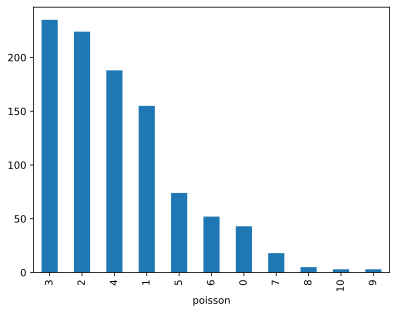

In [34]:
counts.plot(kind='bar');

### 5.3.2 广播数学运算

由于Pandas是建立在NumPy数组之上的，所以数学运算可以在Series和DataFrames中传播。用户可以在Pandas对象上使用NumPy方法，并且还可以选择许多其他数学运算，如下表所示。

**表4** Pandas广播方法

| 函数 | 描述 |
|:-------: | :---------  |
|`abs()` | 绝对值 |
|`count()` | 计数项 |
|`cumsum()` | 累积求和 |
|`cumprod()` | 累积乘积 |
|`mad()` | 平均绝对偏差 |
|`max()` | 最大值 |
|`min()` | 最小值 |
|`mean()` | 平均值 |
|`median()` | 中位数 |
|`mode()` | 众数 |
|`std()` | 标准差 |

```
Pandas中`std()`函数的默认delta自由度（`ddof`）为1，而不是像Microsoft Excel或NumPy（[参见第4.5节](4.5)）中的默认值为0。可以通过`ddof=1`参数修改这种行为。

## 5.4 修改DataFrames

现在您已经能够生成DataFrames，在清理数据或执行计算时，能够修改它们是很有用的。这可以通过诸如赋值、删除行和列以及组合DataFrames或Series等方法来实现。

### 5.4.1 通过赋值插入列

添加新列的可能最简单的方法是通过赋值。如果调用一个不存在的列并赋值，而不是返回一个错误，Pandas会创建一个具有给定名称的新列，并用数据填充它。例如，下面的`elements` DataFrame中没有一个碳列，因此在分配给一个带有数据的Series时，该列被添加。

In [35]:
elements

,H,He,Li,Be,B
name,hydrogen,helium,lithium,beryllium,boron
AN,1,2,3,4,5
mass,1.01,4.0,6.94,9.01,10.81
IE,13.6,24.6,5.4,9.3,8.3


In [36]:
elements['C'] = ['carbon', 6, 12.01, 11.3]
elements

,H,He,Li,Be,B,C
name,hydrogen,helium,lithium,beryllium,boron,carbon
AN,1,2,3,4,5,6
mass,1.01,4.0,6.94,9.01,10.81,12.01
IE,13.6,24.6,5.4,9.3,8.3,11.3


### 5.4.2 自动对齐

Pandas的另一个重要特性是能够根据标签自动对齐数据。在上述示例中，碳被添加到DataFrame中，名称、原子序数、原子质量和电离能与DataFrame中的顺序相同。如果新数据的顺序不正确，会发生什么？如果我们使用NumPy，这将需要用户付出额外的努力来重新排序数据。然而，如果每个值都有标签，Pandas会确保它们被放置在正确的位置。

In [37]:
nitrogen = pd.Series([7, 14.01, 'nitrogen', 14.5], 
                     index=['AN', 'mass', 'name', 'IE'])
nitrogen

AN             7
mass       14.01
name    nitrogen
IE          14.5
dtype: object

在上面的示例中，氮的数据被放置在一个Series中。请注意，这些值相对于`elements`中的数据是无序的。有一些索引标签（即行标签）会告诉pandas每个数据是什么，pandas将使用它们来确定放置新信息的位置。

In [38]:
elements['N'] = nitrogen
elements

,H,He,Li,Be,B,C,N
name,hydrogen,helium,lithium,beryllium,boron,carbon,nitrogen
AN,1,2,3,4,5,6,7
mass,1.01,4.0,6.94,9.01,10.81,12.01,14.01
IE,13.6,24.6,5.4,9.3,8.3,11.3,14.5


新的氮数据列已添加到`elements`中，所有数据都位于正确的行中。

### 5.4.3 删除列

在清理数据时，您可能希望删除某一列或行。Pandas为此提供了`drop()`方法。它需要要删除的列或行的名称，默认情况下，它假定要删除的是行，即 `axis=0`。如果您想要删除一列，请使用`axis=1`参数更改轴。下面，将从元素DataFrame中删除氢列。

In [39]:
elements.drop('H', axis=1)

,He,Li,Be,B,C,N
name,helium,lithium,beryllium,boron,carbon,nitrogen
AN,2,3,4,5,6,7
mass,4.0,6.94,9.01,10.81,12.01,14.01
IE,24.6,5.4,9.3,8.3,11.3,14.5


In [40]:
elements.drop('IE', axis=0)

,H,He,Li,Be,B,C,N
name,hydrogen,helium,lithium,beryllium,boron,carbon,nitrogen
AN,1,2,3,4,5,6,7
mass,1.01,4.0,6.94,9.01,10.81,12.01,14.01


在上面的第二个示例中，尽管之前已经删除了氢，但它又回来了。这是因为`drop()`方法默认情况下不会修改原始DataFrame。要使更改永久生效，可以将新的DataFrame分配给一个新变量，或者在上面的`drop()`函数中添加`inplace=True`关键字参数。

还有一个类似的函数`pd.dropna()`，它用于从包含`nan`值的DataFrame中删除列或行。这通常用于从数据集中删除不完整的数据。`pd.dropna()`函数的行为与`pd.drop()`函数非常相似，包括`inplace=`和`axis=`参数。

### 5.4.4 合并

为了合并多个DataFrame，pandas提供了一个`merge()`方法。与上面类似，`merge()`函数将正确对齐数据，但由于DataFrame有多个列和索引值可以选择，`merge()`函数可以根据这些值中的任何一个对齐数据。`merge()`的默认行为是检查两个DataFrame之间的公共列，并根据这些列对齐数据。作为一个例子，下面是两个包含各种化学化合物数据的DataFrame。

In [41]:
chemdata1 = [['MW', 58.08, 32.04], ['dipole', 2.91, 1.69], 
             ['formula', 'C3H6O', 'CH3OH']] 
columns=['property','acetone', 'methanol']
chmdf1 = pd.DataFrame(chemdata1, columns=columns)

In [42]:
chmdf1

,property,acetone,methanol
0,MW,58.08,32.04
1,dipole,2.91,1.69
2,formula,C3H6O,CH3OH


In [43]:
chmdata2 = [['formula', 'C6H6', 'H2O'], ['dipole', 0.00, 1.85], 
            ['MW', 78.11, 18.02]]
chmdf2 = pd.DataFrame(chmdata2 , columns=['property', 'benzene', 'water'])

In [44]:
chmdf2

,property,benzene,water
0,formula,C6H6,H2O
1,dipole,0.0,1.85
2,MW,78.11,18.02


上面的两个DataFrame都有一个`property`列，因此`merge()`函数使用这个公共列将所有数据对齐到一个新的DataFrame中。

In [45]:
chmdf1.merge(chmdf2)

,property,acetone,methanol,benzene,water
0,MW,58.08,32.04,78.11,18.02
1,dipole,2.91,1.69,0.0,1.85
2,formula,C3H6O,CH3OH,C6H6,H2O


如果有多个具有相同名称的列，用户可以使用`on`关键字参数指定要使用哪个（例如，`on='property'`）。或者，如果两个DataFrame包含用户希望用于对齐的具有不同名称的列，用户可以使用`left_on`和`right_on`关键字参数指定要使用的列。

In [46]:
comps1 = pd.DataFrame({'element':['Co', 'Fe', 'Cr','Ni'], 
                       'protons': [27, 26, 24, 28]})
comps2 = pd.DataFrame({'metal':['Fe', 'Co', 'Cr', 'Ni'], 
                       'IE': [7.90, 7.88, 6.79, 7.64]})

在上面生成的两个DataFrame中，每个都包含了关于钴、铁、铬和镍的数据；但第一个DataFrame将金属标记为`element`，而第二个将金属标记为`metal`。下面的示例根据这两列中的值合并了两个DataFrame。

In [47]:
comps1.merge(comps2, left_on='element',right_on='metal')

,element,protons,metal,IE
0,Co,27,Co,7.88
1,Fe,26,Fe,7.90
2,Cr,24,Cr,6.79
3,Ni,28,Ni,7.64


注意，在生成的DataFrame中，`element`和`metal`列中的值是对齐的。要去掉其中一个冗余列，只需使用第5.4.3节中描述的`drop()`方法。

In [48]:
comps3 = comps1.merge(comps2, left_on='element', 
                      right_on='metal')
comps3.drop('metal', axis=1, inplace=True)
comps3

,element,protons,IE
0,Co,27,7.88
1,Fe,26,7.90
2,Cr,24,6.79
3,Ni,28,7.64


### 5.4.5 拼接

拼接是沿着给定轴连接两个DataFrame的过程。这与上面的`merge()`方法不同，因为`merge()`会合并并对齐两个DataFrame之间的公共数据，而`pd.concat()`会盲目地将一个DataFrame附加到另一个DataFrame上。举个例子，设想两个实验室小组分别测量镁、铝、钛和铁的密度，并将它们的结果加载到下面的DataFrame中。

In [49]:
group1 = pd.DataFrame({'metal':['Mg', 'Al', 'Ti', 'Fe'], 
                       'density': [1.77, 2.73, 4.55, 7.88]})
group2 = pd.DataFrame({'metal':['Al', 'Mg', 'Ti', 'Fe'], 
                       'density': [2.90, 1.54, 4.12, 8.10]})

In [50]:
group1

,metal,density
0,Mg,1.77
1,Al,2.73
2,Ti,4.55
3,Fe,7.88


看看这两个DataFrame拼接时会发生什么。

In [51]:
pd.concat((group1, group2))

,metal,density
0,Mg,1.77
1,Al,2.73
2,Ti,4.55
3,Fe,7.88
0,Al,2.90
1,Mg,1.54
2,Ti,4.12
3,Fe,8.10


注意，这两个DataFrame是如何在不考虑`metal`列中公共值的情况下进行拼接的。默认行为是沿着第一个轴（`axis=0`）进行拼接，但可以通过`axis=`关键字参数修改这个行为。同样，下面的金属并没有全部对齐，因为它们在原始的DataFrame中的顺序不同。

In [52]:
pd.concat((group1, group2), axis=1)

,metal,density,metal,density
0,Mg,1.77,Al,2.90
1,Al,2.73,Mg,1.54
2,Ti,4.55,Ti,4.12
3,Fe,7.88,Fe,8.10


作为比较，如果将两个DataFrame合并而不是拼接它们，pandas会根据下面的示例中的`metal`对齐数据。因为`density`作为列标题出现了两次，pandas通过添加后缀来区分这两个数据集。

In [53]:
pd.merge(group1, group2, on='metal')

,metal,density_x,density_y
0,Mg,1.77,1.54
1,Al,2.73,2.90
2,Ti,4.55,4.12
3,Fe,7.88,8.10


## 参考
[https://github.com/weisscharlesj/SciCompforChemists](https://github.com/weisscharlesj/SciCompforChemists)

## 练习

1. 下面是一个表格，包含了多种常见化学溶剂的熔点和沸点。

    |  Solvent  |  bp  |  mp  |
    |  :------: | :--: | :--: |
    | benzene  | 80 | 6 |
    | acetone | 56 | -95 |
    | toluene | 111 | -95 |
    | pentane |  36 | -130 |
    | ether | 35 | -116 |
    | ethanol | 78 | -114 |
    | methanol | 65 | -98 |


    
    a) 创建一个包含上述溶剂沸点的Series，其中溶剂名称作为索引。调用Series来查找乙醇的沸点。

    b) 创建一个包含沸点和熔点的DataFrame，其中溶剂名称作为索引。调用DataFrame查找苯的熔点。

    c) 使用数值索引从第b部分的DataFrame中访问戊烷的沸点。

    
2. 下载并使用pandas导入文件[blue1.csv](https://bohrium-example.oss-cn-zhangjiakou.aliyuncs.com/notebook/SciCompforChemists/notebooks/chapter_05/data/blue1.csv)，其中包含蓝色1食品染料的吸收光谱。

    a) 将波长设置为索引值。

    b) 绘制吸收与波长的关系图。

    c) 确定蓝色1在620 nm处的吸光度。

3. 化学动力学：使用pandas IO工具导入文件[kinetics.csv](https://bohrium-example.oss-cn-zhangjiakou.aliyuncs.com/notebook/SciCompforChemists/notebooks/chapter_05/data/kinetics.csv)，其中包含A $\rightarrow$ 产物转化的时间序列数据。生成$ln[A]$，$[A]^{-1}$和$[A]^{0.5}$的新列，并确定反应的阶数。

4. 导入包含有关各种简单醇的数据的[ROH_data.csv](https://bohrium-example.oss-cn-zhangjiakou.aliyuncs.com/notebook/SciCompforChemists/notebooks/chapter_05/data/ROH_data.csv)文件到一个DataFrame。注意，这些数据中部分化合物的密度信息缺失。

    a) 使用pandas通过 `pd.dropna()` 函数删除密度列中信息不完整的任何行。检查DataFrame是否发生了变化。

    b) 再次使用 `pd.dropna()` 函数，使用参数 `inplace=True` 删除不完整的行。检查DataFrame是否发生了变化。

5. 导入以下四个文件，其中包含四种食品染料的UV-vis光谱，第一列列出波长（nm），第二列包含吸光度。每个文件包含400-850 nm范围内以1 nm为增量的数据。

    [red40.csv](https://bohrium-example.oss-cn-zhangjiakou.aliyuncs.com/notebook/SciCompforChemists/notebooks/chapter_05/data/red40.csv) [green3.csv](https://bohrium-example.oss-cn-zhangjiakou.aliyuncs.com/notebook/SciCompforChemists/notebooks/chapter_05/data/green3.csv) [blue1.csv](https://bohrium-example.oss-cn-zhangjiakou.aliyuncs.com/notebook/SciCompforChemists/notebooks/chapter_05/data/blue1.csv) [yellow6.csv](https://bohrium-example.oss-cn-zhangjiakou.aliyuncs.com/notebook/SciCompforChemists/notebooks/chapter_05/data/yellow6.csv)

    a) 将这些文件连接成一个DataFrame，第一列为波长（nm），其他四列为每种染料的吸光度。

    b) 用有意义的标签替换列标题。

6. 导入两个文件 [alcohols.csv](https://bohrium-example.oss-cn-zhangjiakou.aliyuncs.com/notebook/SciCompforChemists/notebooks/chapter_05/data/alcohols.csv) 和 [alkanes.csv](https://bohrium-example.oss-cn-zhangjiakou.aliyuncs.com/notebook/SciCompforChemists/notebooks/chapter_05/data/alkanes.csv)，它们包含了两类有机化合物的沸点，与每个化合物中的碳原子数量有关。

    a) 删除包含化合物名称的列。

    b) 合并这两个DataFrame，让pandas根据碳原子数量对齐这两个DataFrame。
